In [1]:
import os

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from palettable.cartocolors.qualitative import Bold_6
from sklearn.preprocessing import RobustScaler


# Default styles based on seaborn themes

This uses seaborn to control the default style and a colormap.

The cell below is the only one that needs to be run. The rest should just work.

In [13]:
sns.set_theme(
    context="paper",
    style="ticks",
    rc={
        "patch.force_edgecolor": False,
        "axes.spines.top": False,
        "axes.spines.right": False,
        "axes.grid": True,
    },
    palette=Bold_6.hex_colors,
)

In [3]:
s = pd.read_parquet(f"../data/sample.parquet")

s.index = s.eFUA_ID.astype(int)
myfolders = os.listdir("../data")
myfolders.remove("sample.parquet")
# initialize lists for quantile values
maq = []
miq = []

# loop trough folders containing polygon data
for folder in myfolders[0:90]:  # first 90 data sets

    i = int(folder)

    # read data
    polygons = gpd.read_parquet(f"../data/" + str(i) + "/polygons")

    # get title for plots
    mytitle = s.at[i, "eFUA_name"] + " (" + s.at[i, "Cntry_name"] + ")"

    # scale data for frequency plot
    data = polygons[["area", "reock"]]
    scaler = RobustScaler(with_centering=False)
    scaled = scaler.fit_transform(data)
    exp = 2
    index = (scaled[:, 0] ** (1 / exp)) * (scaled[:, 1] ** (1 / exp))

    # get 75% quantile for quantile plots
    maq.append(np.quantile(polygons["area"], 0.75))
    miq.append(np.quantile(index, 0.75))

    del (scaler, scaled, index)

Plotting using the default will work in most cases.

Text(0.5, 1.0, 'Range of banana indeces?')

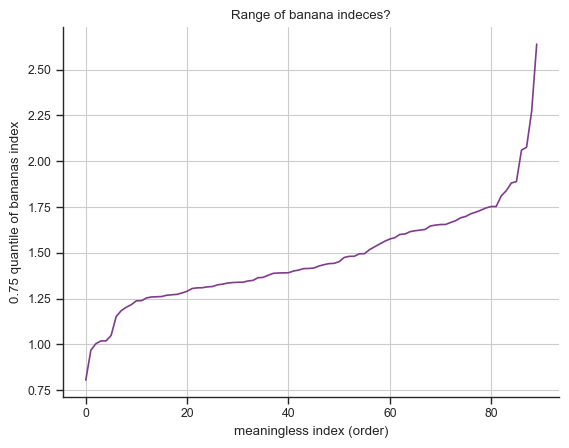

In [14]:
plt.plot(sorted(miq))
plt.xlabel("meaningless index (order)")
plt.ylabel("0.75 quantile of bananas index")
plt.title("Range of banana indeces?")

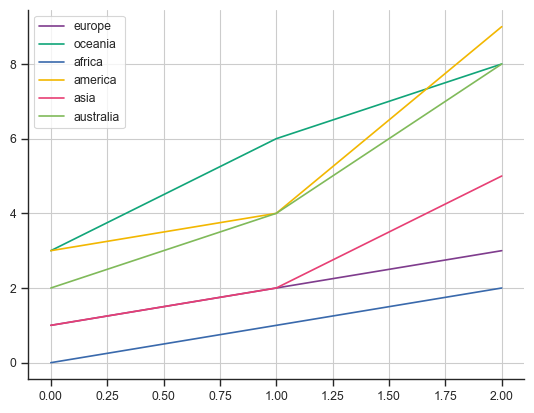

In [15]:
europe = [1, 2, 3]
oceania = [3, 6, 8]
africa = [0, 1, 2]
america = [3, 4, 9]
australia = [2, 4, 8]
asia = [1, 2, 5]

plt.plot(europe, label="europe")
plt.plot(oceania, label="oceania")
plt.plot(africa, label="africa")
plt.plot(america, label="america")
plt.plot(asia, label="asia")
plt.plot(australia, label="australia")

plt.legend()

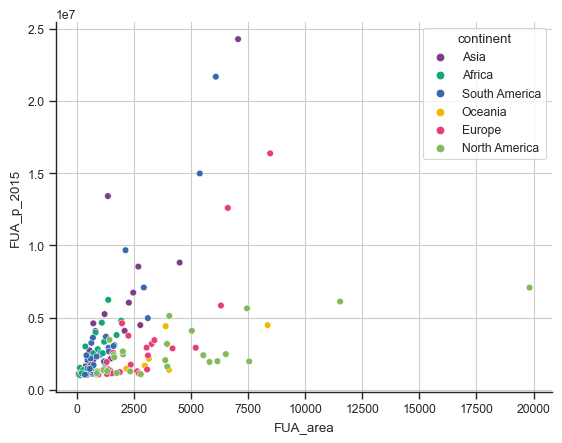

In [12]:
sns.scatterplot(x="FUA_area", y="FUA_p_2015", data=s, hue="continent")

If the grid is too noisy, you can manually override the settings.

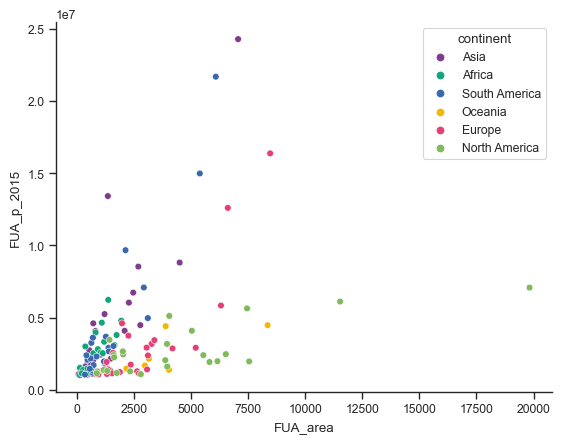

In [16]:
sns.scatterplot(x="FUA_area", y="FUA_p_2015", data=s, hue="continent")
plt.grid(False)